LAB2

1. Lag et mikrofonarray med geometri som i figur II.4. Velg d slik at alle mikrofonene får plass
på koblingsbrettet.

d = 6.5 midt til midt
d= = 5.5 kant til kant

2. Gjør et opptak av et lydsignal med de tre mikrofonene, og vis at de tre signalene ser ut som
forventet, dvs amplituden skal variere rundt 0∗
, og avhengig av hvilket signal du brukte skal
alle tre se ut som sinustoner, impulslyder, støysignaler, eller et slikt signal som du brukte.

importering av pakker som trengs

In [40]:
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
from raspi_import import raspi_import
import scipy.signal as sc

In [41]:
#hente inn data fra måling
sample_period, data = raspi_import('1000Hz_sinus_45G.bin')

#juster data
k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
data = data[5000:,:]*k 
data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

fs = 1/sample_period

mic_1 = data[:,0] #ADC0
mic_2 = data[:,2] #ADC2
mic_3 = data[:,3] #ADC3

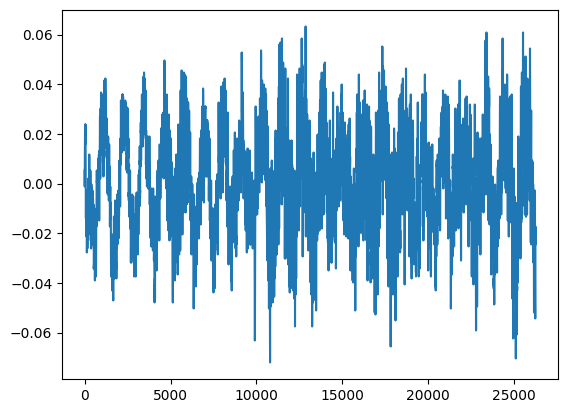

In [42]:
plt.plot(mic_1)
plt.show()

3. Implementer en krysskorrelasjonsberegning for de tre mikrofonsignalene. Finn tidsforsinkelsen
fra toppen av krysskorrelasjonen, uttrykkt i antall sampler og vis de tre krysskorrelasjonssignalene. Du må også vise et eksempel på et autokorrelasjonssignal. Sjekk at du får en topp for eksakt 0 sampels «lag». 
Er toppen for disse krysskorrelasjonssignalene innenfor et intervall som kan forventes, dvs
innenfor ±nmax, hvor nmax gis av avstand mellom mikrofonene, samplingfrekvensen og lydhastigheten?

Funksjon for auto og krysskorrelasjon

In [43]:
#Slower
#r_xy = np.correlate(x,y, mode='full')
#r_xy_abs = np.abs(r_xy)

In [44]:
#Faster
def krysskorrelasjon(x,y): #sett inn data fra ønskede mikrofoner
    r_xy = sc.correlate(x,y, mode='full')
    print(f"Krysskorrelasjonen har en spike ved {np.argmax(r_xy)}")
    return r_xy
def autokorrelasjon(x):
    r_xx = sc.correlate(x, x, mode='full')
    print(f"Autokorrelasjonen har en spike ved {np.argmax(r_xx)}")
    return r_xx


Kode for tidsforsinkelse (delay)

In [45]:
def delay(x, r_xy, micnr, another_micnr): #tar inn parametere x:ett av signalene, r_xy:krysskorrelsjonen
    r_xy_abs = np.abs(r_xy)
    l_max = np.argmax(r_xy_abs) - (len(x) - 1)
    delta_t = l_max/fs
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i sekunder: {delta_t} s")
    return delta_t #enhet sekunder

def delay_samples(x, y, micnr, another_micnr):
    n_samples = np.argmax(krysskorrelasjon(x,y)) - np.argmax(autokorrelasjon(x))
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i antall samples: {n_samples}")
    return n_samples #enhet antall samples

Plot av teori ang krysskorrelasjon

Krysskorrelasjonen har en spike ved 983


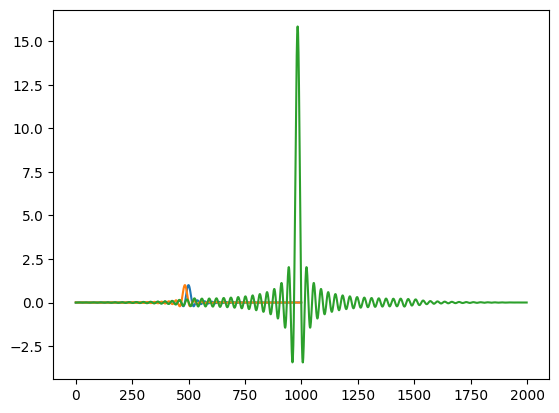

In [46]:
t = np.linspace(-5,5, 1000)*np.pi*2
r_11 = krysskorrelasjon(np.sinc(t+2),np.sinc(t+1))

plt.plot(np.sinc(t))
plt.plot(np.sinc(t+1))
plt.plot(r_11)
plt.show()

Utregning av krysskorrelasjon mellom dataen fra mikrofonene

In [47]:
r_21 = krysskorrelasjon(mic_2,mic_1)
r_31 = krysskorrelasjon(mic_3,mic_1)
r_32 = krysskorrelasjon(mic_3,mic_2)

Krysskorrelasjonen har en spike ved 26252
Krysskorrelasjonen har en spike ved 26252
Krysskorrelasjonen har en spike ved 26249


Plot av krysskorrelasjoner

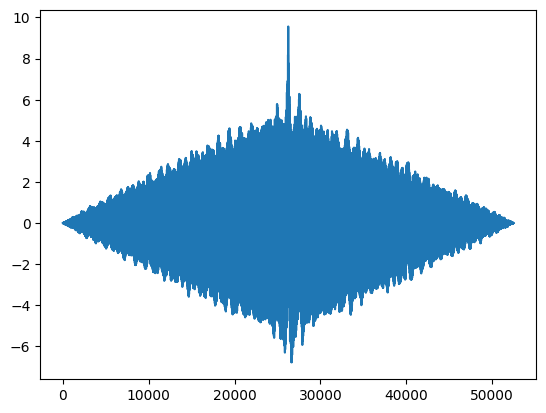

Delay mellom mikrofon mic 1 og mic 2 i sekunder: -0.03664 s
Krysskorrelasjonen har en spike ved 26246
Autokorrelasjonen har en spike ved 26249
Delay mellom mikrofon mic 1 og mic 3 i antall samples: -3


np.int64(-3)

In [48]:
plt.plot(r_12)
plt.show()

delay(mic_1,mic_2, 1, 2)
delay_samples(mic_1, mic_3, 1, 3)

Utregning av autokorrelasjoner

In [49]:
r_11 = autokorrelasjon(mic_1) 
r_22 = autokorrelasjon(mic_2)
r_33 = autokorrelasjon(mic_3)

Autokorrelasjonen har en spike ved 26249
Autokorrelasjonen har en spike ved 26249
Autokorrelasjonen har en spike ved 26249


Plot av autokorrelajoner

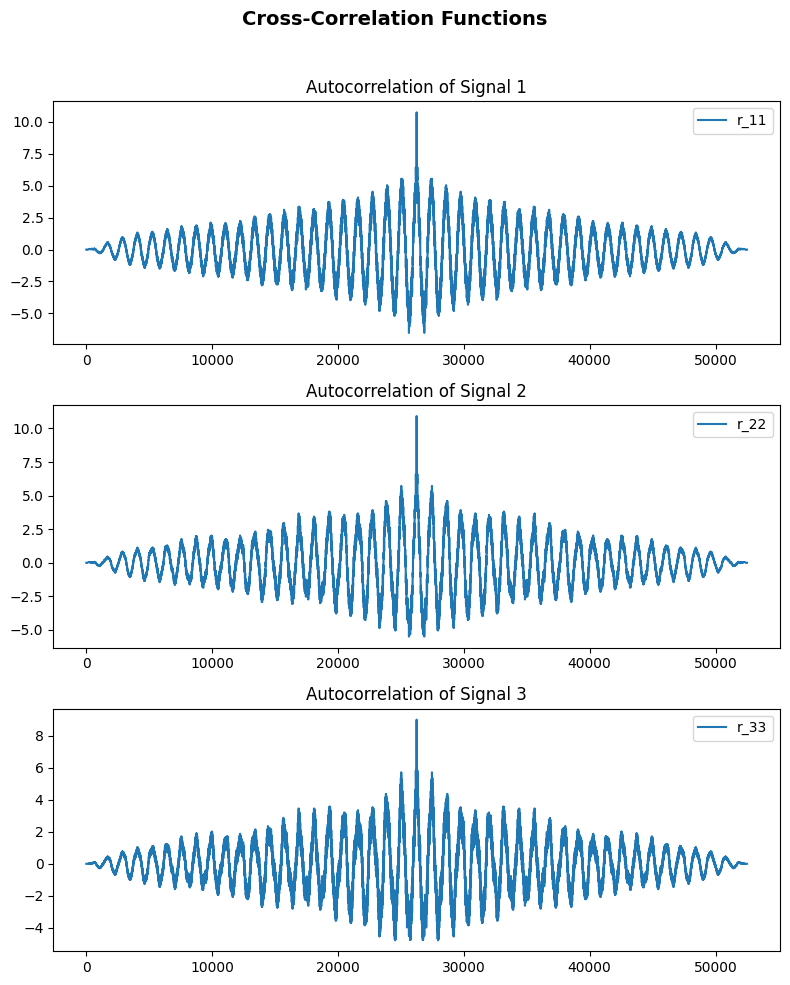

In [50]:
# Create a new figure
plt.figure(figsize=(8, 10))  # Adjust size as needed

# Common title
plt.suptitle("Cross-Correlation Functions", fontsize=14, fontweight='bold')

# First plot
plt.subplot(3, 1, 1)  # (rows, columns, index)
plt.plot(r_11, label="r_11")
plt.title("Autocorrelation of Signal 1")
plt.legend()

# Second plot
plt.subplot(3, 1, 2)
plt.plot(r_22, label="r_22")
plt.title("Autocorrelation of Signal 2")
plt.legend()

# Third plot
plt.subplot(3, 1, 3)
plt.plot(r_33, label="r_33")
plt.title("Autocorrelation of Signal 3")
plt.legend()

# Show all plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()




4) Beregn innfallsvinkelen (i planet som de tre mikrofonene er plassert) fra de tre tidsforsinkelsene. Vis at du kan detektere innfallsvinkel fra −180 til +180 grader

In [51]:
def theta(n_21, n_31, n_32):
    if ((n_31 - n_21 + 2*n_32) < 0):
        theta = np.arctan(np.sqrt(3) * ((n_31 + n_21)/(n_31 - n_21 + 2*n_32))) + np.pi
    else:
        theta = np.arctan(np.sqrt(3) * ((n_31 + n_21)/(n_31 - n_21 + 2*n_32)))
        
    print(f"Innfallsvinkelen theta er på {theta} grader")
    return theta

In [52]:
n_21 = delay_samples(mic_2, mic_1, 2, 1)
n_31 = delay_samples(mic_3, mic_1, 3, 1)
n_32 = delay_samples(mic_3, mic_2, 3, 2)

theta(n_21, n_31, n_32)

Krysskorrelasjonen har en spike ved 26252
Autokorrelasjonen har en spike ved 26249
Delay mellom mikrofon mic 2 og mic 1 i antall samples: 3
Krysskorrelasjonen har en spike ved 26252
Autokorrelasjonen har en spike ved 26249
Delay mellom mikrofon mic 3 og mic 1 i antall samples: 3
Krysskorrelasjonen har en spike ved 26249
Autokorrelasjonen har en spike ved 26249
Delay mellom mikrofon mic 3 og mic 2 i antall samples: 0
Innfallsvinkelen theta er på 1.5707963267948966 grader


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14128\1506177879.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(np.sqrt(3) * ((n_31 + n_21)/(n_31 - n_21 + 2*n_32)))


np.float64(1.5707963267948966)

5. Gjør en systematisk variasjon av estimert innfallsvinkel for flere innfallsvinkler. Gjør flere,
minimum 5, gjentatte målinger for samme innfallsvinkel for å få et mål på usikkerheten.
Standardavviket og variansen er mål som godkjennes. Gjør dette for minimum 3 forskjellige
vinkler